**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Spring 2021; Prof. V. F. de Almeida

# Neutron Diffusion on a Spherical Domain in Vacuum
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor:** 

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**27Mar2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Analytical Solution](#analyticalsol)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Setup](#setup)
* [Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

- Text... 

- Text... 

## [Problem Statement](#toc)<a id="problem"></a>

### [Strong Form of Problem Statement](#toc)<a id="dbcstrong"></a>

This investigation looks to determine how FEM computation of the neutron diffusion equation compare to linear transport theory given standard assumptions about the definition of the diffusion coefficient in homogenous mediums far from and close to voids. Defining diffusion coefficients for neutron transport is an active field of research and includes approximations such as isotropic scattering, linear in angle, nonlocal weighting of nearby average transport properties, Monte Carlo study and experiment.

Understanding the connection between linear transport theory and diffusion theory is important for analysis of radiative transfer and neutron transport under certain physical conditions for reactor research and dosimetry studies. Here we will compare the analytic linear transport result for non-absorbing and moderately absorbing mediums given a point source in spherical geometry.

The time independent, 1-group neutron diffusion (NDE) equation is written for a single non fissile material as:

\begin{align*}
    \nabla \cdot D \nabla \Phi(r) -\Sigma_{tot} \Phi(r) + S' = 0 \ \ \ (1A)
\end{align*}

The neutron scalar flux is: $\Phi(r)\ [n/cm^2 s]$ 

The total macroscopic cross section is: $\Sigma_{tot} = \Sigma_{non-el} + \Sigma_{el} \approx \Sigma_{in} + \Sigma_{el}$

For brevity, $S' = Q^{fis}_{ext} + Q^{sc}_{in}$, is written as the combined source for exterior sources and fission sources or scatter in from out of group (up and down scatter). The full _scatter in term_ requires a _group averaged scatter cross section_ that further requires a _transfer function_ differential in post collision direction $\Omega \cdot \Omega '$. 

Here for the free surface (vacuum) boundary condition. The neutron density at the outer boundary $\Phi(r) = |v| n(r) = 0$ if $ n_b\cdot \Omega < 0 $.



In [1]:
import pyvista as pv
# pv.set_plot_theme('paraview')

radius_i = 1
radius_o = 20 * radius_i
outer = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_o)
inner = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_i)

plo = pv.Plotter(notebook=True, shape=(1,1)) 

plo.subplot(0,0)
plo.add_mesh(outer, color='lightblue', opacity=0.99,)
plo.add_mesh(inner, color='red', opacity=1)
plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Phi')

cpos = plo.show(window_size=[800, 600])

ModuleNotFoundError: No module named 'appdirs'

### [Strong Form of Problem Statement](#toc)<a id="dbcstrong"></a>

The neutron intensity, in the diffusion limit, in a spherical domain with a concentrated finite source at the origin, gives rise to a Poisson model problem for the neutron intensity $I:[a,b]\in\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D\, I'\bigr)'(r) - \Sigma_a\, I &= 0 \quad \forall \quad r\in [a,b], \\
 q_n(a)^- &= S, \\
 q_n(b)^+ &= \frac{\alpha}{2}\, I.
\end{align*}
   
This problem has an analytical solution for constant values of $D$, $S$, and $\Sigma_a$. The outer boundary condition on the forward normal flux of neutrons implies that the backward normal flux is null, $q_n(b)^- = 0$. The particular value of $\alpha$ depends on the model assumed for the neutron distribution at the outer boundary. The model used here is as follows:

\begin{align*}
\text{Place holder for vacuum model}
\end{align*}

- Text... 

## [Objectives](#toc)<a id="obj"></a>

1. Gather Cross Section Data to provide study parameters
2. Set up two analytical solutions
    - Set up the non-asymptotic analytic solution __complete__  
    - Set up the asymptotic analytic solution with transient __almost complete__  
3. Use MOOSE to calculate diffusion equation (1)
    - Set up spherical coordinate system: __complete__
    - Identify best test functions for problem domain: __unknown__  
    - "Absorption" term $\Sigma_{tot}\Phi $ is causing strong oscillations when included __unknown__  
    

## [Approach](#toc)<a id="app"></a>

### [Analytic Solution](#toc)<a id="analyticalsol"></a> 

A general solution is commonly given without the asymptotic condition as:

\begin{align*}
    \Phi(r) =  \frac{S_0 e^{-\kappa r}}{4\pi Dr} \ \ \ (2)
\end{align*}

On the other hand, linear transport theory does provide a result at the asymptotic limit for moderately absorbing mediums given that the source flux is not infinity. The integral transport equation is written:


\begin{align*}
    \Phi(r) = \int dV\  \frac{S_0 e^{- \Sigma_t r}}{4 \pi r^2} [c \Sigma_t \Phi(r') + S_0 \delta(r')] \ \ \ (3)
\end{align*}

In this solution we will currently assume $S_0 = \Phi_0$ for a single distributed source.

### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 


The weak form of the neutron diffusion equation (NDE) is arrived to by:

1. Multiply NDE by a test function $\phi$.
2. Integrate over spatial and angular domain.
3. Use divergence theorem to set the boundary condition across the domain surface.

The weak form and boundary condition becomes:

\begin{align*}
    ( \nabla \phi, D \nabla \Phi  )\ - < \phi, D \nabla \Phi \cdot \bar{n_b} > +\ (\phi , \Sigma_{tot} \Phi) = 0 \ \ \ (1B)
\end{align*}

This weak form contains the volume and surface integral as written with parenthesis and brackets respectively. The boundary conditions for the partial currents at the surface given as $\Gamma^{\pm}$ must be solved for:

\begin{align*}
    \Gamma^{+} = J^{out}({R_S}) = \nabla \Phi \cdot \bar{n_b}
\end{align*}

\begin{align*}
    \Gamma^{-} = J^{in}({R_S}) = 0
\end{align*}

Here we will use the homogenous Neumann boundary condition, which is equivalent to the Robin boundary condition such that the reflectivity at the boundary is 0 as:

\begin{align*}
    \frac{1}{4} \Phi + \frac{1}{2} D \nabla \Phi \cdot \bar{n_b} = J^{-} = \frac{\Phi}{4} - \frac{J}{2} = \frac{\Phi}{4} - \frac{D \nabla \Phi}{2}
\end{align*}

Solving for the weak form boundary condition and multiplying our test function $\phi$:

\begin{align*}
     \phi (D \nabla \Phi \cdot \bar{n_b}) = \phi( \frac{1}{2} D \nabla \Phi)
\end{align*}

__These boundary conditiions are not fitting - VacuumBC condition is sought instead__

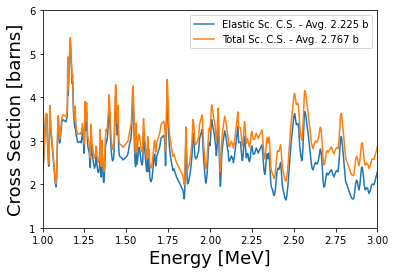

In [1]:
import numpy as np
import matplotlib.pyplot as plt
file2 = np.genfromtxt('./SigTot_Al.csv',delimiter=",",comments = '#')
file1 = np.genfromtxt('./SigEl_Al.csv',delimiter=",",comments = '#')
plt.xscale("linear")
plt.yscale("linear")
plt.xlim([1, 3])
plt.ylim([1, 6])
plt.xlabel(r'Energy [MeV]', fontsize=18)
plt.ylabel(r'Cross Section [barns]', fontsize=18)
plt.plot(file1[1:,0]*1e-6, file1[1:,1],label="Elastic Sc. C.S. - Avg. 2.225 b")
plt.plot(file2[1:,0]*1e-6, file2[1:,1],label="Total Sc. C.S. - Avg. 2.767 b")
plt.legend()
plt.show()

### [MOOSE Kernels](#toc)<a id="kernels"></a>

The following MOOSE kernels were implemented to solve the [weak form](#weakform):
1. Diffusion term weak form integrand: $D \nabla \Phi \cdot \nabla \phi$ (MOOSE kernel) [interface](./include/kernels/DiffusionTerm.h) and [implementation](./src/kernels/DiffusionTerm.C).

### [Setup](#toc)<a id="setup"></a>

In [8]:
'''Domain'''

x_a = 0
x_b = 1000

x_length = x_b - x_a

In [9]:
'''Parameters'''

diff_coeff = 2.04
s_source = 0

In [10]:
'''Data (boundary conditions)'''

u_a = 4.17
transfer_coeff_right = 2.0

In [11]:
'''FEM Solution'''

n_felem = 10

order = 'first'

n_plot_pts = n_felem + 1

from tools.toolkit import write_engy5310_p1_1d_input_file

write_engy5310_p1_1d_input_file(x_left=x_a, x_right=x_b, 
                                u_left=u_a, 
                                transfer_coeff_right=transfer_coeff_right,
                                diff_coeff=diff_coeff,
                                n_felem=n_felem, order=order, 
                                n_plot_pts=n_plot_pts,
                                use_moose_neumann_bc=True,
                                file_name='input.hit')

ModuleNotFoundError: No module named 'tools'

In [39]:
!./neutron-ball-opt -i input.hit



*** Warning, This code is deprecated and will be removed in future versions:
The parameter 'use_legacy_dirichlet_bc' is no longer valid.

All Dirichlet boundary conditions are preset by default.

Remove said parameter in main to remove this deprecation warning.
Stack frames: 10
0: 0   libmesh_opt.0.dylib                 0x0000000105cb741b libMesh::print_trace(std::__1::basic_ostream<char, std::__1::char_traits<char> >&) + 1067
1: 1   libmoose-opt.0.dylib                0x00000001053f620e void moose::internal::mooseDeprecatedStream<libMesh::BasicOStreamProxy<char, std::__1::char_traits<char> >, char const (&) [62], char const (&) [59], char const (&) [26], std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, char const (&) [37]>(libMesh::BasicOStreamProxy<char, std::__1::char_traits<char> >&, bool, char const (&) [62], char const (&) [59], char const (&) [26], std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >

- Text...

## [Results and Analysis](#toc)<a id="ranalysis"></a>

- Text...

In [40]:
'''Plot function for FEM Solution'''

def plot_solution(df, 
                  title='No Title', 
                  basis_functions_type='No basis functions type',
                  flux_basis_functions_type='No basis functions type'):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.style.use('dark_background')

    (fig, ax1) = plt.subplots(1, figsize=(14, 5))

    ax1.plot(df['x'], df['u'].abs()*2.4e9,'r*-',label=basis_functions_type)

    ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
    ax1.set_ylabel(r'$u_h(x)$ [g/cc]', fontsize=18, color='red')
    ax1.set_xscale('log')
    ax1.set_yscale('log')

    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='center left', fontsize=12)
    ax1.set_ylim(1e-12,1e12)
    ax1.grid(True)

    if 'diffFluxU_x' in df.columns:
        # create a twin x axis to be shared
        ax2 = ax1.twinx()

        ax2.plot(df['x'], df['diffFluxU_x'],'b*-',label=flux_basis_functions_type)

        ax2.set_ylabel(r"$q_h(x)$ [g/cm2-s]", fontsize=16, color='lightblue')
        ax2.tick_params(axis='y', labelcolor='lightblue', labelsize=14)
        ax2.legend(loc='center right', fontsize=12)
        #ax2.set_ylim(0,2)
        #ax2.grid(True)

    plt.title(title, fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

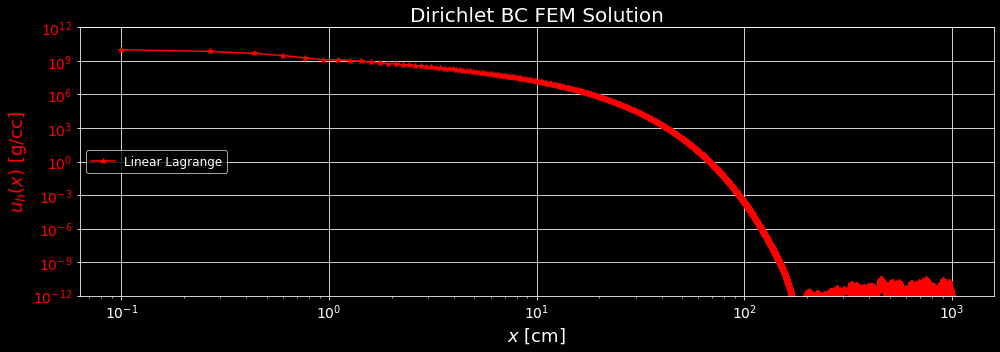

In [41]:
import pandas as pd
df = pd.read_csv('output_x-data_0002.csv')
plot_solution(df, title='Dirichlet BC FEM Solution', basis_functions_type='Linear Lagrange', flux_basis_functions_type='Constant Monomial')

- Text...

## [Conclusions](#toc)<a id="conclusions"></a>

- Text...

- Text...

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [3] author, [reference]()
- [4] author, [reference]()